In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

In [3]:
results = pd.read_csv('BC_final_results.csv', index_col=0)
ms_results = pd.read_csv('BC_MS_results.csv', index_col=0)
sample_info = pd.read_csv('BC_sample_info.csv', index_col=0)

In [4]:
df = pd.read_table('data/Layer2_BC_count_matrix-1.tsv', index_col=0)
df = df.loc[sample_info.index]
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes

dfm = np.log10(df + 1)

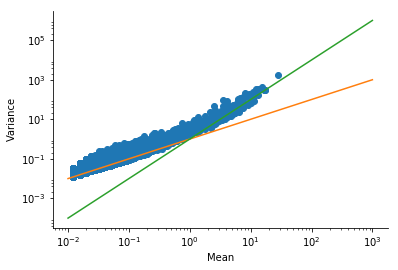

In [5]:
figsize(6, 4)
plt.loglog()
plt.scatter(df.mean(), df.var());
xy = [1e-2, 1e3]
plt.plot(xy, xy, c='C1');
plt.plot(xy, np.square(xy), c='C2');
plt.xlabel('Mean')
plt.ylabel('Variance');

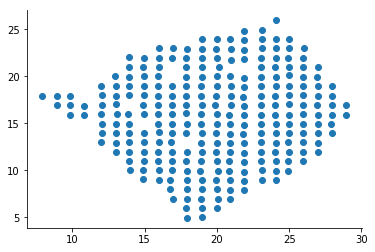

In [6]:
plt.scatter(sample_info.x, sample_info.y);

In [7]:
results.model.value_counts()

SE    12856
Name: model, dtype: int64

In [43]:
results['pval'] = results['pval'].clip_lower(results.query('pval > 0')['pval'].min() / 2)
results['qval'] = results['qval'].clip_lower(results.query('qval > 0')['qval'].min() / 2)
ms_results['pval'] = ms_results['pval'].clip_lower(ms_results.query('pval > 0')['pval'].min() / 2)
ms_results['qval'] = ms_results['qval'].clip_lower(ms_results.query('qval > 0')['qval'].min() / 2)

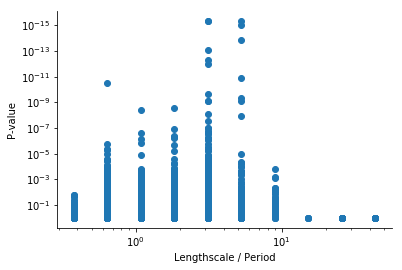

In [9]:
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

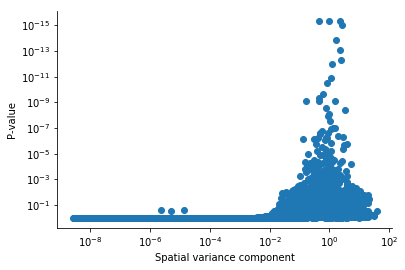

In [10]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

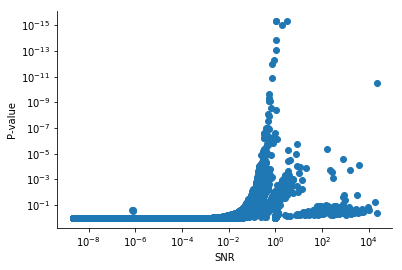

In [11]:
plt.loglog()
plt.scatter(1. / results.max_delta, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('P-value');

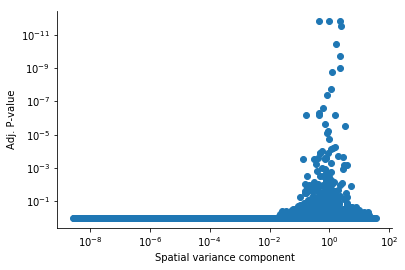

In [12]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('Adj. P-value');

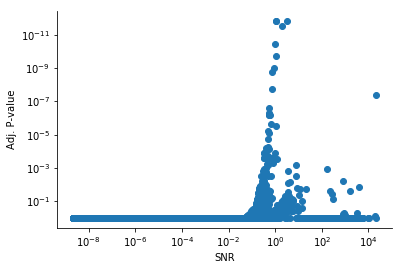

In [13]:
plt.loglog()
plt.scatter(1./ results.max_delta, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('Adj. P-value');

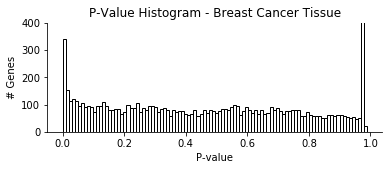

In [14]:
figsize(6, 2)
plt.hist(results.query('pval < 1.')['pval'], bins=100, color='w', ec='k');
plt.title('P-Value Histogram - Breast Cancer Tissue')
plt.ylabel('# Genes')
plt.xlabel('P-value');
plt.ylim(ymax=400)

plt.savefig('BC-pvalue-hist.pdf')

In [15]:
results.query('qval < 0.05').shape

(114, 15)

In [186]:
N = 5
top_per_ls = ms_results \
                  .sort_values('qval', ascending=True) \
                  .groupby(['model','l']) \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])
                
top_per_ls

,BIC,LLR,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,time,pval,qval,max_ll_null
30,-201.345464,44.047156,4,SNAP25,0.641736,0.000045,111.715654,-1.371608,0.838175,SE,250,0.000316,3.205591e-11,4.121108e-08,67.668498
26,393.039941,22.683446,4,HMGCS2,0.641736,0.123198,-185.477049,-2.956878,3.822974,SE,250,0.001014,1.910063e-06,6.296352e-04,-208.160495
28,-170.068827,21.220997,4,SSPO,0.641736,0.006145,96.077335,-1.264139,0.717899,SE,250,0.000403,4.092564e-06,1.223581e-03,74.856338
38,-155.204362,20.675405,4,ZNF880,0.641736,0.286942,88.645103,-1.390751,0.760450,SE,250,0.000681,5.441043e-06,1.589774e-03,67.969698
27,-50.901270,19.315432,4,ETV7,0.641736,0.132787,36.493557,-1.470111,0.920321,SE,250,0.000745,1.108071e-05,2.967784e-03,17.178124
45,640.138701,34.724042,4,TGM2,1.087806,0.892182,-309.026429,-4.468248,3.333690,SE,250,0.000499,3.799107e-09,2.873019e-06,-343.750471
48,190.419249,26.578791,4,CXCL13,1.087806,1.030126,-84.166703,-1.707101,0.479013,SE,250,0.000395,2.530060e-07,1.277761e-04,-110.745493
49,-230.943314,24.531208,4,IL12RB1,1.087806,0.838747,126.514579,-1.397142,0.298391,SE,250,0.000598,7.311595e-07,2.764643e-04,101.983371
44,430.881327,23.091364,4,CXCL9,1.087806,1.279875,-204.397742,-2.651375,1.106132,SE,250,0.000487,1.544830e-06,5.367657e-04,-227.489106
47,383.815189,19.163421,4,FGG,1.087806,1.542051,-180.864673,-1.971915,0.617966,SE,250,0.000584,1.199909e-05,3.085205e-03,-200.028093


In [187]:
top_per_ls.shape

(37, 15)

In [188]:
model_colors = {'SE': 'C0', 'PER': 'C1'}

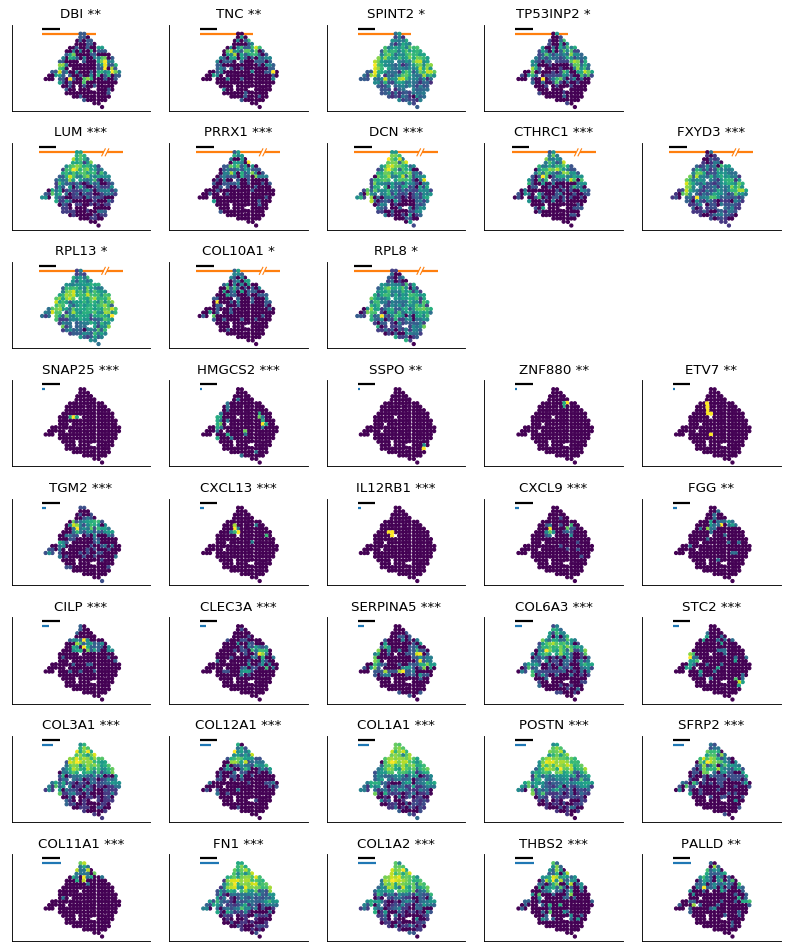

In [189]:
plt.figure(figsize=(10, 12), dpi=80)

N = 5
N_rows = top_per_ls['l'].unique().shape[0]
for j, T in enumerate(top_per_ls.groupby(['model', 'l'])):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        ax = plt.subplot(N_rows, N, j * N + i + 1)

        plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=8);
        
        s = ' *'
        if r['qval'] < 0.01:
            s = ' **'

        if r['qval'] < 0.001:
            s = ' ***'

        plt.title(r['g'] + s)

        plt.xticks([])
        plt.yticks([])
        plt.hlines(-3.5, 7, 12, lw=2)
        if r['l'] + 7 < 28:
            plt.hlines(-5, 7, 7 + r['l'], lw=2, color=model_colors[r['model']], zorder=0)
            
        else:
            plt.hlines(-5, 7, 25.5, lw=2, color=model_colors[r['model']], zorder=0)
            plt.plot([25, 26], [-6, -4], lw=1, color=model_colors[r['model']])
            plt.plot([26, 27], [-6, -4], lw=1, color=model_colors[r['model']])
            plt.hlines(-5, 26.5, 31, lw=2, color=model_colors[r['model']])
            
        plt.axis('equal')

plt.tight_layout()
plt.savefig('top_BC_genes_per_ls.pdf')

In [27]:
# Scale bar (black) in µm
5 * 200

1000

In [50]:
stahl_genes = ["IGFBP5", "SPARC", "VIM", "FN1", "POSTN", "MUCL1", "PIP", "SCGB2A2",' \
                         '"GAS6", "KRT17", "PEG10", "AREG", "MNP14", "DCN"]

In [53]:
N = 2
top_per_ls = ms_results.query('g not in @stahl_genes') \
                  .sort_values('qval', ascending=True) \
                  .groupby('l') \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])

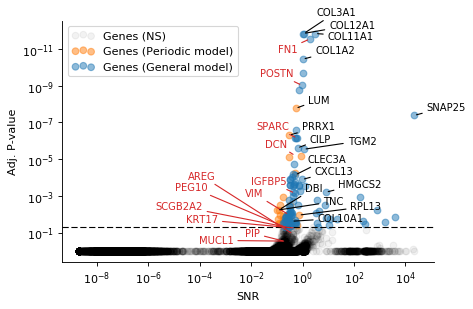

In [178]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')

tmp = results.query('qval > 0.05')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.05, rasterized=True, label='Genes (NS)', marker='o', color='k');

tmp = ms_results.query('model == "PER"')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Periodic model)', marker='o', color='C1');

tmp = ms_results.query('model == "SE"')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (General model)', marker='o', color='C0');


# Annotate Stahl genes
tmp = results.query('g in @stahl_genes')

x_offsets = {'FN1': 3,
             'SCGB2A2': 2e3,
             'MUCL1': 1e2,
             'VIM': 1e1,
             'PIP': 1e1,
             'PEG10': 1e3,
             'KRT17':1e3,
             'AREG': 1e3}
y_offsets = {'MUCL1': 0.75,
             'FN1': 2e-1,
             'PEG10': 1e2,
             'VIM': 1e1,
             'SCGB2A2': 1e1,
             'AREG': 1e3,
             'KRT17': 2,
             'PIP': 2}
for i, r in tmp.iterrows():
    xy = (1./r['max_delta'], r['qval'])
    xyt = (xy[0] / x_offsets.get(r['g'], 2),
           xy[1] / y_offsets.get(r['g'], 3),)
    plt.annotate(r['g'], xy, xyt, color='tab:red', horizontalalignment='right',
                 arrowprops={'arrowstyle': '-', 'color': 'tab:red'}, size=9)
    

# Annotate top genes
x_offsets = {'COL3A1': 3,
             'COL12A1': 1e1,
             'TGM2': 5e1,
             'COL10A1':1e1,
             'RPL13': 1e2,
             'TNC': 6e1,
             'DBI': 1e1}
y_offsets = {'COL3A1': 1e1,
             'COL11A1': 5e-1,
             'CLEC3A': 5,
             'COL10A1': 1,
             'DBI': 1e1}
for i, r in top_per_ls.iterrows():
    xy = (1./r['max_delta'], r['qval'])
    xyt = (xy[0] * x_offsets.get(r['g'], 3),
           xy[1] / y_offsets.get(r['g'], 2),)
    plt.annotate(r['g'], xy, xyt, color='k', arrowprops={'arrowstyle': '-'}, size=9)

    
plt.axhline(0.05, ls='--', c='k', lw=1)
    
plt.xlabel('SNR');
plt.ylabel('Adj. P-value');
plt.gca().invert_yaxis()

plt.legend(scatterpoints=3, loc='upper left')

plt.savefig('sigma_pval_BC.pdf', bbox_inches='tight');

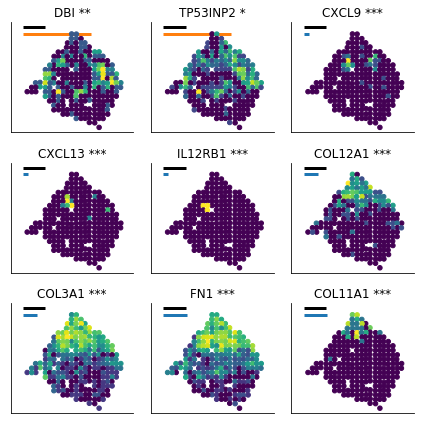

In [179]:
figsize(6, 6)
N = 3
N_rows = 3
gene_sel = ["CXCL13", "CXCL9", "DBI", "COL3A1", "TP53INP2", "COL11A1", "FN1", "COL12A1", "IL12RB1"]
select_genes = ms_results.query('g in @gene_sel')
for i, idx in enumerate(select_genes.index):
    r = select_genes.loc[idx]
    plt.subplot(N_rows, N, i + 1)

    plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=20);

    s = ' *'
    if r['qval'] < 0.01:
        s = ' **'

    if r['qval'] < 0.001:
        s = ' ***'

    plt.title(r['g'] + s)

    plt.xticks([])
    plt.yticks([])
    plt.hlines(-3.5, 7, 12, lw=3)
    if r['l'] + 7 < 28:
        plt.hlines(-5, 7, 7 + r['l'], lw=3, color=model_colors[r['model']], zorder=0)

    else:
        plt.hlines(-5, 7, 25.5, lw=2, color=model_colors[r['model']], zorder=0)
        plt.plot([25, 26], [-6, -4], lw=1, color=model_colors[r['model']])
        plt.plot([26, 27], [-6, -4], lw=1, color=model_colors[r['model']])
        plt.hlines(-5, 26.5, 31, lw=2, color=model_colors[r['model']])

    plt.axis('equal')


plt.tight_layout()
plt.savefig('BC_select_genes.pdf')

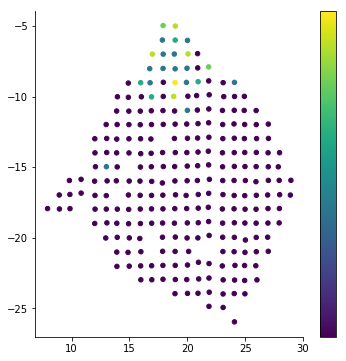

In [184]:
plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=20);
plt.colorbar(ticks=[]);
plt.savefig('plot_with_cbar.pdf');